In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis Book Chapter/MLTweet.csv')

In [ ]:
df

,Unnamed: 0,Subjectivity,Polarity,Sentiment
0,0,0.000000,0.000000,0
1,1,0.000000,0.000000,0
2,2,0.500000,0.000000,0
3,3,0.000000,0.000000,0
4,4,0.166667,0.000000,0
...,...,...,...,...
2221,2221,0.426190,0.332778,2
2222,2222,0.000000,0.000000,0
2223,2223,0.400000,0.300000,2
2224,2224,0.000000,0.000000,0


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,Subjectivity,Polarity,Sentiment
0,0.000000,0.000000,0
1,0.000000,0.000000,0
2,0.500000,0.000000,0
3,0.000000,0.000000,0
4,0.166667,0.000000,0
...,...,...,...
2221,0.426190,0.332778,2
2222,0.000000,0.000000,0
2223,0.400000,0.300000,2
2224,0.000000,0.000000,0


In [ ]:
X=df2.iloc[:,:2].values
X

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.5       , 0.        ],
       ...,
       [0.4       , 0.3       ],
       [0.        , 0.        ],
       [0.26666667, 0.2       ]])

In [ ]:
Y=df2.iloc[:,2:].values
Y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# create a support vector machine model
model = SVC()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
precision_micro = precision_score(y_test, y_pred, average='micro')

In [ ]:
print(f'Test accuracy: {accuracy}')
print(f'Test f1 score: {f1_micro}')
print(f'Test recall: {recall_micro}')
print(f'Test precision: {precision_micro}')

Test accuracy: 0.9394618834080718
Test f1 score: 0.9394618834080718
Test recall: 0.9394618834080718
Test precision: 0.9394618834080718


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[202   3   8]
 [  7  43   1]
 [  4   4 174]]


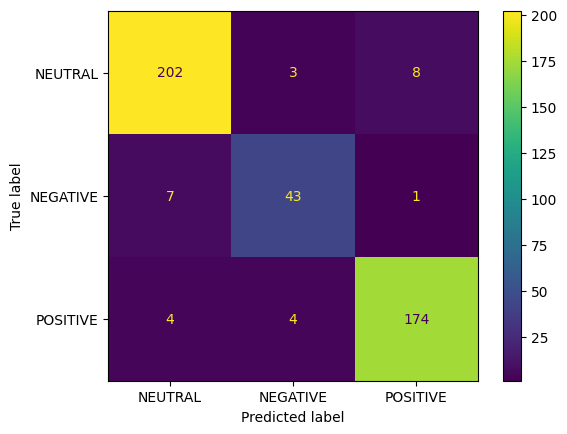

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEUTRAL','NEGATIVE','POSITIVE'])
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       213
           1       0.86      0.84      0.85        51
           2       0.95      0.96      0.95       182

    accuracy                           0.94       446
   macro avg       0.92      0.92      0.92       446
weighted avg       0.94      0.94      0.94       446

